# EFTfitter.jl - Empty Template

In [1]:
using EFTfitter
using BAT            # for sampling
using IntervalSets   # for specifying the prior
using Distributions  # for specifying the prior
using Plots          # for plotting

### Parameters

In [2]:
parameters = BAT.distprod(
    p1 = -2..2,
)

NamedTupleDist((p1 = Distributions.Uniform{Float64}(a=-2.0, b=2.0),))

### Observables

In [3]:
function observable1(params)
    return params.p1
end

observable1 (generic function with 1 method)

### Measurements

In [4]:
measurements = (
    Meas1 = Measurement(observable1, 0.0, uncertainties = (unc1 = 0.1,), active=true),

    #MeasDist = BinnedMeasurement(obs_array, values_array, uncertainties = (unc1 = unc1_array,), active=false),
)

(Meas1 = EFTfitter.Measurement(EFTfitter.Observable
  prediction: observable1 (function of type typeof(Main.var"##339".observable1))
  min: Float64 -Inf
  max: Float64 Inf
  weight: Float64 1.0
, 0.0, (unc1 = 0.1,), true),)

### Correlations

In [5]:
correlations = (
    unc1 = NoCorrelation(active=true),
)

#corr_matrix = to_correlation_matrix(measurements,
#  (:Meas1, :Meas2, 0.1),
#)

(unc1 = EFTfitter.NoCorrelation
  active: Bool true
,)

create an `EFTfitterModel` object:

In [6]:
model = EFTfitterModel(parameters, measurements, correlations)

EFTfitter.EFTfitterModel(NamedTupleDist((p1 = Distributions.Uniform{Float64}(a=-2.0, b=2.0),)), (Meas1 = EFTfitter.Measurement(EFTfitter.Observable
  prediction: observable1 (function of type typeof(Main.var"##339".observable1))
  min: Float64 -Inf
  max: Float64 Inf
  weight: Float64 1.0
, 0.0, (unc1 = 0.1,), true),), NamedTuple(), nothing, (unc1 = EFTfitter.Correlation{LinearAlgebra.Symmetric{Float64, Matrix{Float64}}}([1.0;;], true),), nothing, Matrix{Float64})

create posterior distribution:

In [7]:
posterior = PosteriorMeasure(model);

sample the posterior distribution with BAT.jl:

In [8]:
algorithm = MCMCSampling(mcalg = MetropolisHastings(), nsteps = 10^5, nchains = 4)
samples = bat_sample(posterior, algorithm).result;

[ Info: MCMCChainPoolInit: trying to generate 4 viable MCMC chain(s).
[ Info: Selected 4 MCMC chain(s).
[ Info: Begin tuning of 4 MCMC chain(s).
[ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 4 converged.
[ Info: MCMC Tuning cycle 2 finished, 4 chains, 2 tuned, 4 converged.
[ Info: MCMC Tuning cycle 3 finished, 4 chains, 2 tuned, 4 converged.
[ Info: MCMC Tuning cycle 4 finished, 4 chains, 4 tuned, 4 converged.
[ Info: MCMC tuning of 4 chains successful after 4 cycle(s).
[ Info: Running post-tuning stabilization steps for 4 MCMC chain(s).


let's get a quick overview of results:

In [9]:
bat_report(samples)

### Sampling result

  * Total number of samples: 131311
  * Total weight of samples: 399994
  * Effective sample size: between 59094 and 59094

#### Marginals

| Parameter | Mean         | Std. dev. | Gobal mode  | Marg. mode |    Cred. interval    | Histogram                                                  |
|:--------- |:------------ |:--------- |:----------- |:---------- |:--------------------:|:---------------------------------------------------------- |
| p1        | -0.000846173 | 0.10064   | -1.84236e-7 | -0.005     | -0.0965158 .. 0.1052 | ⠀⠀-0.421[⠀⠀⠀⠀⠀⠀⠀⠀⠀▁▁▂▃▄▅▆▇████▇▆▅▄▃▂▁▁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀[0.46⠀⠀⠀⠀ |


 plot the posterior distribution:

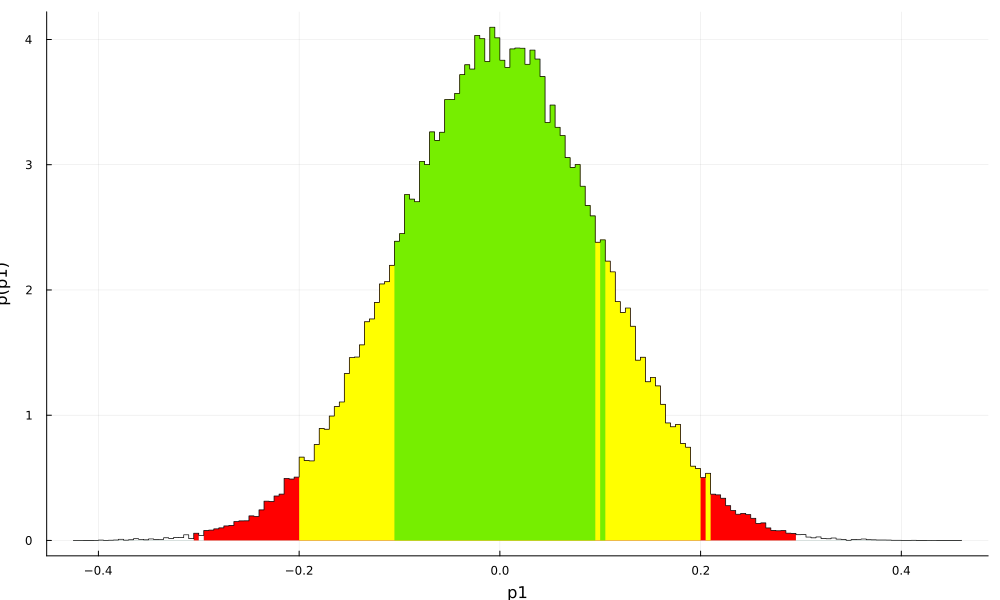

In [10]:
p = plot(samples)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*